In [317]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

df = pd.read_csv("appdata10[1].csv")

df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [319]:
df.shape

(50000, 12)

In [321]:
all_hours = df.hour.str.split(":")

real_hours = []

for i in all_hours:
    real_hours.append(i[0])


df.hour = real_hours

In [323]:
df2 = df.drop(['first_open','screen_list','enrolled_date','user'],axis=1)

In [325]:
df2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,02,23,15,0,0,0,0
1,6,01,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,00,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


<Figure size 640x480 with 0 Axes>

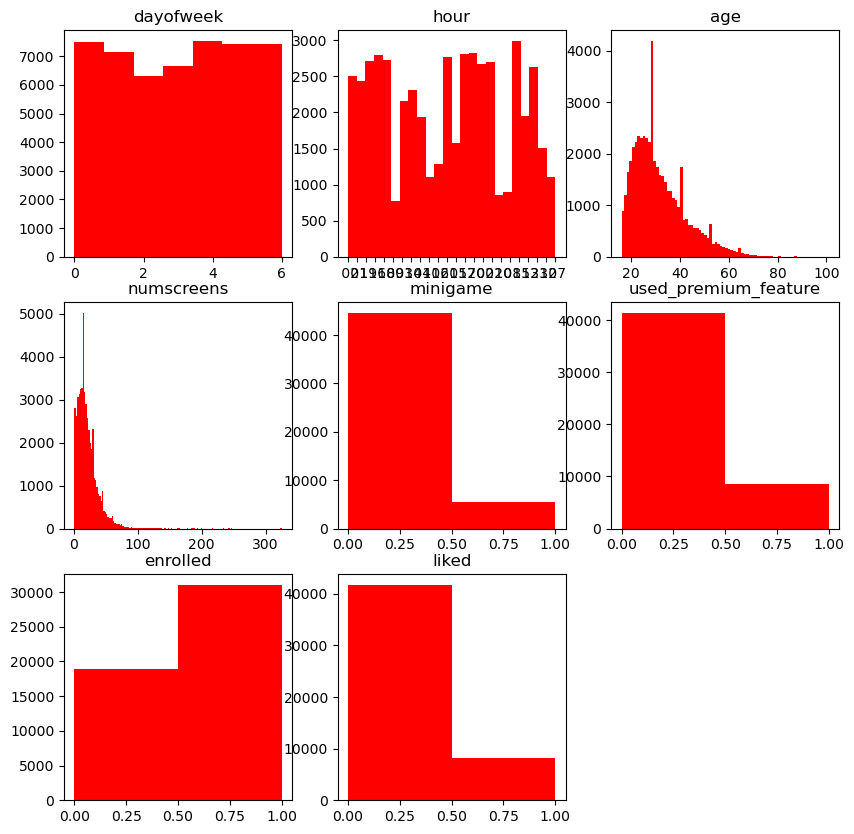

In [327]:
plt.suptitle("Histogram",fontsize=10)
plt.figure(figsize=(10,10))
for i in range(1,df2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df2.columns.values[i-1])
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1],bins = vals,color='red')
    

<Axes: >

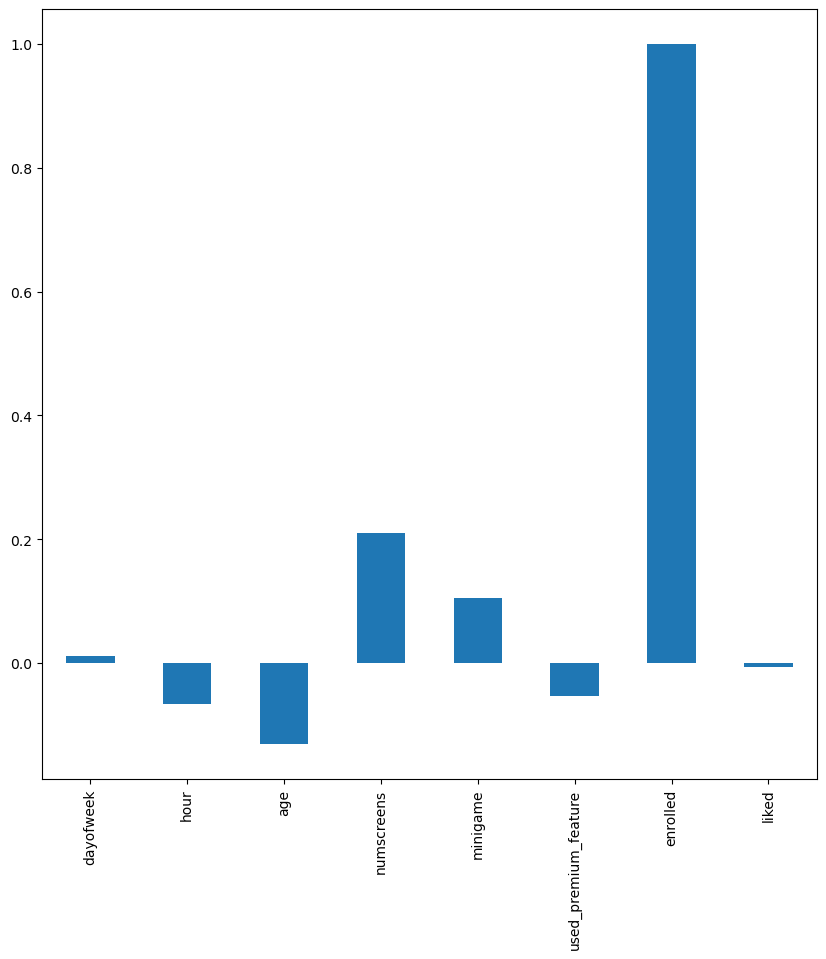

In [328]:
df2.corrwith(df.enrolled).plot.bar(figsize = (10,10))

<Axes: >

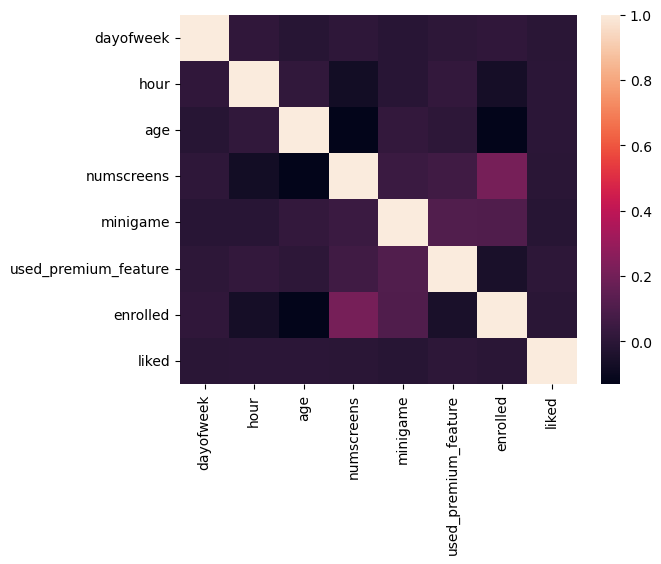

In [331]:
sns.heatmap(df2.corr(),annot=False)


In [333]:
df.first_open = [parser.parse(row) for row in df.first_open]
df.enrolled_date = [parser.parse(row) if isinstance(row,str) else row for row in df.enrolled_date]

In [334]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [335]:
df['diff'] = (df.enrolled_date - df.first_open)/np.timedelta64(1,'h')

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   178.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

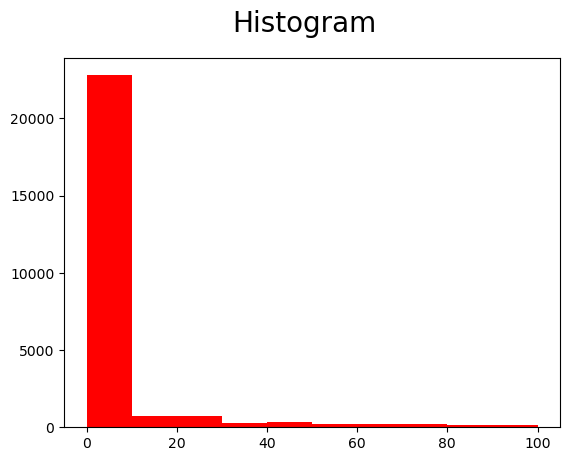

In [336]:
plt.suptitle('Histogram',fontsize=20)
plt.hist(df['diff'].dropna(),color='red',range=[0,100])

In [341]:
df.loc[df.diff > 48,'enrolled'] = 0

TypeError: '>' not supported between instances of 'method' and 'int'

In [343]:
top = pd.read_csv("top_screens[1].csv").top_screens.values
top

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [345]:
df['screen_list'] = df.screen_list.astype(str) + ','

df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,diff
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.050877
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.096994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.026390
49996,169179,2013-04-09 00:05:17.823,1,00,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.042895


In [347]:
for sc in top:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_test'] =df.screen_list.str.replace(sc+",","")

df['other'] = df.screen_list.str.count(',')
df = df.drop(columns = ['screen_list'])




In [348]:
df = df.drop(['first_open','enrolled_date'],axis=1)

In [349]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,diff,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,02,23,15,0,0,0,0,NaN,...,1,0,0,0,0,0,0,0,0,13
1,333588,6,01,24,13,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,11
2,254414,1,19,23,3,0,1,0,1,NaN,...,0,0,0,0,0,0,0,0,0,3
3,234192,4,16,28,40,0,0,1,0,0.050877,...,0,0,0,0,0,0,0,0,0,17
4,51549,1,18,31,32,0,0,1,1,0.096994,...,0,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0.026390,...,0,0,1,0,0,0,0,0,0,11
49996,169179,1,00,35,4,0,1,0,0,NaN,...,0,0,0,0,0,0,0,0,0,4
49997,302367,2,22,39,25,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,10
49998,324905,6,12,27,26,0,0,1,0,0.042895,...,0,0,0,0,0,0,0,0,0,19


In [353]:
df.hour = df.hour.astype(str)

In [355]:
df.hour = [int(i.split(":")[0]) for i in df.hour]




In [357]:
df = df.fillna(0)

In [359]:
df.drop_duplicates(inplace=True)

In [369]:
x = df.drop(['enrolled'],axis=1)
y = df.enrolled

In [375]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [367]:
df = df.drop(['screen_test'],axis=1)

KeyError: "['screen_test'] not found in axis"

In [302]:
df.to_csv("new_old.csv")

In [377]:
x

array([[ 0.4475546 , -0.01461066, -1.41935665, ..., -0.09094118,
        -0.08740827,  0.00233158],
       [ 1.36109286,  1.46176487, -1.55379869, ..., -0.09094118,
        -0.08740827, -0.27951613],
       [ 0.62643559, -0.99886101,  0.86615799, ..., -0.09094118,
        -0.08740827, -1.40690696],
       ...,
       [ 1.07139252, -0.50673584,  1.26948411, ..., -0.09094118,
        -0.08740827, -0.42043998],
       [ 1.28052311,  1.46176487, -0.07493627, ..., -0.09094118,
        -0.08740827,  0.8478747 ],
       [-1.48330777,  0.47751452, -1.55379869, ..., -0.09094118,
        -0.08740827,  0.8478747 ]])

In [312]:
from sklearn.model_selection import train_test_split

x = df.drop(['enrolled'],axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [379]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [391]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()

mod = mod.fit(x_train,y_train)

In [401]:
pred = mod.predict(x_test)

In [441]:
testo = np.concatenate([y_test.reshape(-1,1),pred.reshape(-1,1)],axis=1)

In [443]:
testo

array([[1, 1],
       [0, 0],
       [1, 1],
       ...,
       [0, 0],
       [1, 1],
       [1, 0]], dtype=int64)

In [447]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8389213411218692